In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [4]:
from google.colab import files


uploaded = files.upload()

Saving air_quality_health_impact_data.csv to air_quality_health_impact_data.csv


In [5]:
df = pd.read_csv('air_quality_health_impact_data.csv')
df

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [6]:
df.isna().sum()
# To check for missing data

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


In [7]:
df.drop(columns='RecordID', inplace=True)
#data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQI                  5811 non-null   float64
 1   PM10                 5811 non-null   float64
 2   PM2_5                5811 non-null   float64
 3   NO2                  5811 non-null   float64
 4   SO2                  5811 non-null   float64
 5   O3                   5811 non-null   float64
 6   Temperature          5811 non-null   float64
 7   Humidity             5811 non-null   float64
 8   WindSpeed            5811 non-null   float64
 9   RespiratoryCases     5811 non-null   int64  
 10  CardiovascularCases  5811 non-null   int64  
 11  HospitalAdmissions   5811 non-null   int64  
 12  HealthImpactScore    5811 non-null   float64
 13  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 635.7 KB


In [33]:
X = df[['AQI','PM10','PM2_5','NO2','SO2','O3','Temperature','Humidity','WindSpeed']]

y = df['HealthImpactClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [38]:
X_train.describe()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed
count,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000
mean,250.033037,148.187133,99.869770,102.691015,48.978387,149.719464,14.985310,54.926273,10.040724
std,144.955783,85.412762,58.328327,57.496381,28.575078,86.573102,14.509606,26.138239,5.769508
min,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.970262,10.001506,0.002094
25%,123.753427,74.542103,48.723915,54.607745,24.229904,74.776681,2.482026,31.940460,5.018116
50%,251.248341,146.929311,99.711410,102.729711,48.405977,150.297001,14.918029,55.076061,10.173447
75%,375.588682,221.849041,151.508241,152.155360,73.172514,224.030255,27.538969,77.853796,14.939938
max,499.858837,299.901962,199.984965,199.980195,99.950880,299.936812,39.963434,99.997493,19.999139


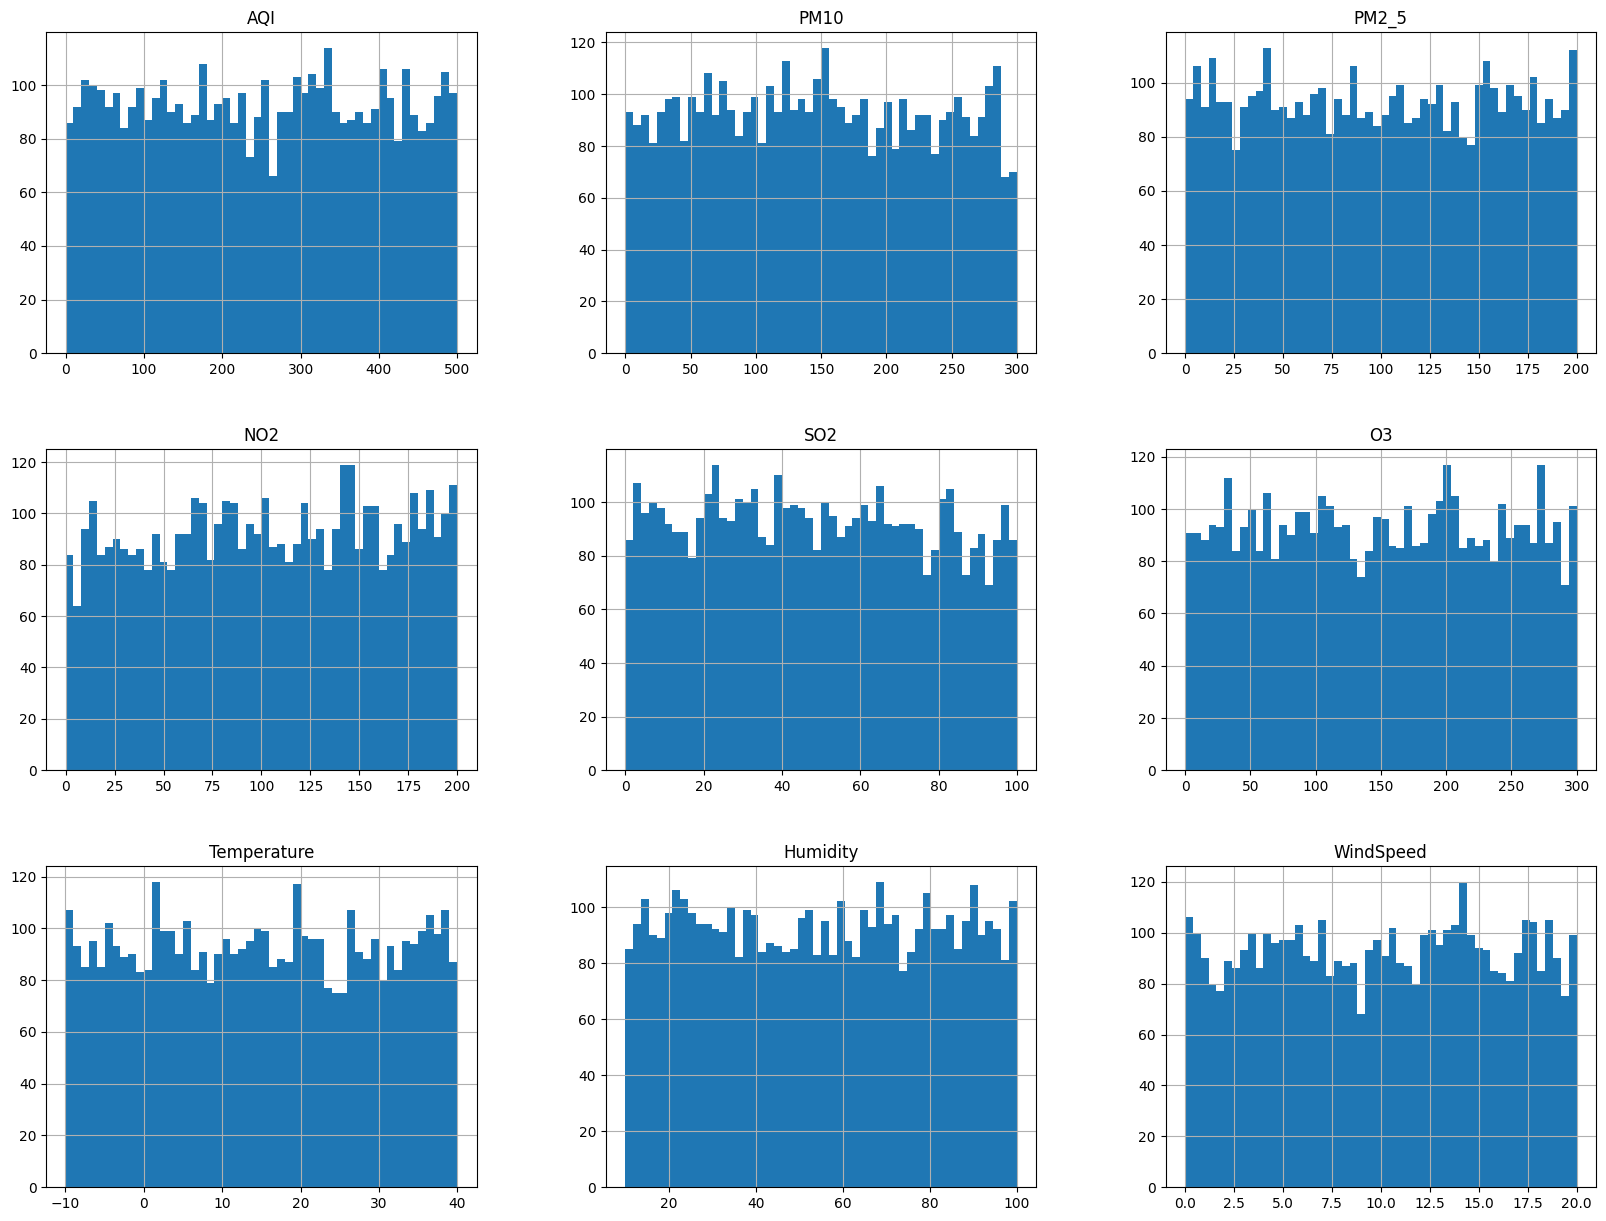

In [39]:
#to check the plots of different feature and choose some of them as targets
X_train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8976784178847808
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       960
         1.0       0.64      0.65      0.64       111
         2.0       0.79      0.57      0.66        58
         3.0       0.56      0.24      0.33        21
         4.0       0.00      0.00      0.00        13

    accuracy                           0.90      1163
   macro avg       0.58      0.49      0.52      1163
weighted avg       0.88      0.90      0.89      1163



In [41]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Accuracy: 0.8675838349097162
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       960
         1.0       0.47      0.42      0.45       111
         2.0       0.50      0.14      0.22        58
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00        13

    accuracy                           0.87      1163
   macro avg       0.38      0.31      0.32      1163
weighted avg       0.82      0.87      0.84      1163



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.8693035253654342
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       960
         1.0       0.49      0.61      0.54       111
         2.0       0.56      0.24      0.34        58
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00        13

    accuracy                           0.87      1163
   macro avg       0.40      0.36      0.37      1163
weighted avg       0.84      0.87      0.85      1163



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
